#                                      SENTIMENT ANALYSIS

## Importing libraries

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

## Reading training data 

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
train_original=train.copy()
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## Reading Test data

In [3]:
test = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')
test_original=test.copy()
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


## Combining data

In [4]:
data = train.append(test, ignore_index='true', sort='true')

In [5]:
data.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [6]:
data.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


In [7]:
data.shape

(49159, 3)

## Removing handles 

In [8]:
def remove_handles(text,pattern):
    
    twitter_handles = re.findall(pattern,text)
    
    for each_handle in twitter_handles:
        text = re.sub(each_handle,"",text)
    
    return text

In [9]:
data['filtered_tweets']=np.vectorize(remove_handles)(data['tweet'],"@['\w']*")

In [10]:
data.head()

,id,label,tweet,filtered_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Removing punctuations

In [11]:
data['filtered_tweets'] = data['filtered_tweets'].str.replace("[^a-zA-Z#]", " ")
data.head(5)

,id,label,tweet,filtered_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## Removing Stop Words

In [12]:
data['filtered_tweets'] = data['filtered_tweets'].apply(lambda tweet: ' '.join([word for word in tweet.split() if len(tweet)>3]))
data.head()

,id,label,tweet,filtered_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause they...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## Tokenisation

In [13]:
tweet_words =  data['filtered_tweets'].apply(lambda tweet:tweet.split())
tweet_words

0        [when, a, father, is, dysfunctional, and, is, ...
1        [thanks, for, #lyft, credit, i, can, t, use, c...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                  [factsguide, society, now, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, a, mermaid, #hairflip, #neverr...
49156    [#hillary, #campaigned, today, in, #ohio, omg,...
49157    [happy, at, work, conference, right, mindset, ...
49158    [my, song, so, glad, free, download, #shoegaze...
Name: filtered_tweets, Length: 49159, dtype: object

## Stemming

In [14]:
from nltk import PorterStemmer

stem_helper = PorterStemmer()

tweet_words = tweet_words.apply(lambda words: [stem_helper.stem(i) for i in words])

tweet_words.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: filtered_tweets, dtype: object

## Reassembling stemmed words for each tweet

In [15]:
for i in range(len(tweet_words)):
    tweet_words[i]=' '.join(tweet_words[i])

    
data['filtered_tweets'] = tweet_words
data.head()

,id,label,tweet,filtered_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguid societi now #motiv


## Final dataset

In [16]:
data.head(10)

,id,label,tweet,filtered_tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguid societi now #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talk befor they leav cha...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exam can ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cav #champion #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here i m it s so #gr


In [17]:
data.tail(10)

,id,label,tweet,filtered_tweets
49149,49150,NaN,loving lifeðºð¸âï¸ð #createyourfutu...,love life #createyourfutur #lifestyl #holiday ...
49150,49151,NaN,"black professor demonizes, proposes nazi style...",black professor demon propos nazi style confis...
49151,49152,NaN,learn how to think positive. #positive #ins...,learn how to think posit #posit #instagram #in...
49152,49153,NaN,"we love the pretty, happy and fresh you! #teen...",we love the pretti happi and fresh you #teenil...
49153,49154,NaN,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,damn tuff ruff muff techno citi ng web ukhx in...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factori left right polaris #trump #use...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feel like a mermaid #hairflip #neverreadi #for...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillari #campaign today in #ohio omg amp use ...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happi at work confer right mindset lead to cul...
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ...",my song so glad free download #shoegaz #newmus...


## Extracting hashtags

In [18]:
def extract_hashtags(text):
    hashtags_list=[]
    for word in text:
        hashtags=re.findall(r'#(\w+)',word)
        hashtags_list.append(hashtags)
    return hashtags_list

In [19]:
positive_hashtags = extract_hashtags(data['filtered_tweets'][data['label']==0])
positive_hashtags

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 ['gr'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 

In [20]:
#unnesting the lists
positive_tags = sum(positive_hashtags,[])
positive_tags

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'gr',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughiseno

In [21]:
negative_hashtags = extract_hashtags(data['filtered_tweets'][data['label']==1])
negative_hashtags

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['p', 'p', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', '

In [22]:
#unnesting the lists
negative_tags=sum(negative_hashtags,[])
negative_tags

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejudic',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'p',
 'p',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prais',
 'cleveland',
 'rnc',
 'white',
 'tamirric',
 'rip',
 'bigot',
 'blacklivesmatt',
 'fe

## Analysing hashtags

In [23]:
positive_hashtags_count = nltk.FreqDist(positive_tags)
positive_hashtags_count

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'i': 394, 'summer': 390, ...})

In [24]:
negative_hashtags_count = nltk.FreqDist(negative_tags)
negative_hashtags_count

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

## Plotting negative hashtags (wrt to frequency)

In [25]:
negative_dataframe = pd.DataFrame({'hashtags':list(negative_hashtags_count.keys()),'Count':list(negative_hashtags_count.values())})
negative_dataframe

,hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
...,...,...
1750,jumpedtheshark,1
1751,freemilo,5
1752,milo,4
1753,mailboxprid,1


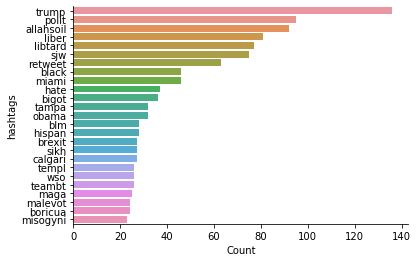

In [26]:
negative_hashtags_plot = negative_dataframe.nlargest(25,columns='Count') 
sns.barplot(data=negative_hashtags_plot,y='hashtags',x='Count')
sns.despine()

## Feature Exatraction

In [27]:
from sklearn.feature_extraction.text import CountVectorizer